In [492]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [493]:
with open('ei_intermediate_file_paths.json') as output_path_file:
    file_paths = json.load(output_path_file)

NOAA_PROCCESSED_INPUT_PATH = file_paths.get("stage1_noaa_output.csv")

BLS_PROCESSED_INPUT_PATH = file_paths.get("stage1_bls_output.csv")

STAGE2_OUTPUT_PATH = file_paths.get("stage2_fs_merged_output.csv")


In [494]:
# Load the datasets into dataframes
noaa_df = pd.read_csv(NOAA_PROCCESSED_INPUT_PATH)
bls_df = pd.read_csv(BLS_PROCESSED_INPUT_PATH)

In [495]:
# Rename columns to indicate their source and convert to lowercase
noaa_df = noaa_df.rename(columns=lambda x: f"noaa_{x.lower()}")
bls_df = bls_df.rename(columns=lambda x: f"bls_{x.lower()}")

# Convert date columns to datetime format
bls_df['bls_date'] = pd.to_datetime(bls_df['bls_date'])
noaa_df['noaa_date'] = pd.to_datetime(noaa_df['noaa_date'])

In [496]:
print("First rows of BLS Dataset")
print(bls_df.head(5))

First rows of BLS Dataset
    bls_date  bls_curr_sae_hrs  bls_curr_laus_labor_force  \
0 2024-12-01               NaN                        NaN   
1 2024-11-01               NaN                        NaN   
2 2024-10-01               NaN                        NaN   
3 2024-09-01              36.0                   449955.0   
4 2024-08-01              36.2                   449065.0   

   bls_curr_laus_unemployment_rate  bls_prev_yr_sae_hrs  \
0                              NaN                 36.0   
1                              NaN                 35.5   
2                              NaN                 35.9   
3                              3.3                 35.9   
4                              3.2                 36.5   

   bls_prev_yr_laus_labor_force  bls_prev_yr_laus_unemployment_rate  \
0                           NaN                                 NaN   
1                           NaN                                 NaN   
2                           NaN        

In [497]:
print("BLS Columns")
print(bls_df.columns)


bls_num_rows = bls_df.shape[0]
print(f"Number of rows in BLS Dataset: {bls_num_rows}")

BLS Columns
Index(['bls_date', 'bls_curr_sae_hrs', 'bls_curr_laus_labor_force',
       'bls_curr_laus_unemployment_rate', 'bls_prev_yr_sae_hrs',
       'bls_prev_yr_laus_labor_force', 'bls_prev_yr_laus_unemployment_rate',
       'bls_pct_diff_sae_hrs', 'bls_pct_diff_laus_labor_force',
       'bls_pct_diff_laus_unemployment_rate'],
      dtype='object')
Number of rows in BLS Dataset: 216


In [498]:
print("First rows of the NOAA Dataset")
print(noaa_df.head(5))

print("\nColumn names in NOAA dataset:")
print(noaa_df.columns)

noaa_num_rows = noaa_df.shape[0]
print(f"Number of rows in NOAA Dataset: {noaa_num_rows}")

First rows of the NOAA Dataset
                              noaa_name  noaa_date  noaa_tavg  noaa_tmax  \
0  MEMPHIS INTERNATIONAL AIRPORT, TN US 2009-09-01       75.7       83.4   
1  MEMPHIS INTERNATIONAL AIRPORT, TN US 2009-10-01       60.7       69.0   
2  MEMPHIS INTERNATIONAL AIRPORT, TN US 2009-11-01       55.1       65.1   
3  MEMPHIS INTERNATIONAL AIRPORT, TN US 2009-12-01       40.9       48.3   
4  MEMPHIS INTERNATIONAL AIRPORT, TN US 2010-01-01       37.1       45.2   

   noaa_tmin  noaa_prcp  
0       68.0       8.60  
1       52.5      10.55  
2       45.1       1.37  
3       33.5       5.13  
4       29.0       3.93  

Column names in NOAA dataset:
Index(['noaa_name', 'noaa_date', 'noaa_tavg', 'noaa_tmax', 'noaa_tmin',
       'noaa_prcp'],
      dtype='object')
Number of rows in NOAA Dataset: 181


## Merge the NOAA and BLS Datasets

In [499]:
# Create a complete date range DataFrame for all months between the desired dates
full_date_range = pd.date_range(start='2007-01-01', end='2024-10-31', freq='MS')
date_df = pd.DataFrame({'date': full_date_range})

# Merge the BLS dataset with the full date range DataFrame on 'bls_date' and 'date'
bls_merged_df = pd.merge(date_df, bls_df, left_on='date', right_on='bls_date', how='left')

# Merge the NOAA dataset with the full date range DataFrame on 'noaa_date' and 'date'
noaa_merged_df = pd.merge(date_df, noaa_df, left_on='date', right_on='noaa_date', how='left')

In [500]:
# Merge the resulting DataFrames on 'date'
merged_df = pd.merge(bls_merged_df, noaa_merged_df, on='date', how='outer')

print("\nFirst rows of the merged dataset:")
print(merged_df.head(5))




First rows of the merged dataset:
        date   bls_date  bls_curr_sae_hrs  bls_curr_laus_labor_force  \
0 2007-01-01 2007-01-01              36.5                   418651.0   
1 2007-02-01 2007-02-01              37.2                   417496.0   
2 2007-03-01 2007-03-01              36.6                   418341.0   
3 2007-04-01 2007-04-01              37.2                   416759.0   
4 2007-05-01 2007-05-01              36.3                   418696.0   

   bls_curr_laus_unemployment_rate  bls_prev_yr_sae_hrs  \
0                              4.3                  NaN   
1                              4.1                  NaN   
2                              3.6                  NaN   
3                              3.3                  NaN   
4                              3.3                  NaN   

   bls_prev_yr_laus_labor_force  bls_prev_yr_laus_unemployment_rate  \
0                           NaN                                 NaN   
1                           NaN    

In [501]:
print(merged_df.columns)

Index(['date', 'bls_date', 'bls_curr_sae_hrs', 'bls_curr_laus_labor_force',
       'bls_curr_laus_unemployment_rate', 'bls_prev_yr_sae_hrs',
       'bls_prev_yr_laus_labor_force', 'bls_prev_yr_laus_unemployment_rate',
       'bls_pct_diff_sae_hrs', 'bls_pct_diff_laus_labor_force',
       'bls_pct_diff_laus_unemployment_rate', 'noaa_name', 'noaa_date',
       'noaa_tavg', 'noaa_tmax', 'noaa_tmin', 'noaa_prcp'],
      dtype='object')


In [502]:
# Determine which rows in the merged dataset have null values in one or more columns
null_rows = merged_df[merged_df.isnull().any(axis=1)]

print("\nRows with null values:")
print(null_rows['date'])


Rows with null values:
0     2007-01-01
1     2007-02-01
2     2007-03-01
3     2007-04-01
4     2007-05-01
5     2007-06-01
6     2007-07-01
7     2007-08-01
8     2007-09-01
9     2007-10-01
10    2007-11-01
11    2007-12-01
12    2008-01-01
13    2008-02-01
14    2008-03-01
15    2008-04-01
16    2008-05-01
17    2008-06-01
18    2008-07-01
19    2008-08-01
20    2008-09-01
21    2008-10-01
22    2008-11-01
23    2008-12-01
24    2009-01-01
25    2009-02-01
26    2009-03-01
27    2009-04-01
28    2009-05-01
29    2009-06-01
30    2009-07-01
31    2009-08-01
213   2024-10-01
Name: date, dtype: datetime64[ns]


In [503]:
filtered_merged_df = merged_df.dropna()

In [504]:
# Filter for only the months in fire season (May 1 - Oct 31)
fire_season_df = filtered_merged_df[filtered_merged_df['date'].dt.month.isin([5, 6, 7, 8, 9, 10])]

In [505]:
fire_season_df.to_csv(STAGE2_OUTPUT_PATH, index=False)

## Graphs

## BLS Data

In [506]:
# Calculate average values over the fire season for each year
fire_season_df['year'] = fire_season_df['date'].dt.year
fire_season_avg_df = fire_season_df.groupby('year').agg({
    'bls_pct_diff_sae_hrs': 'mean',
    'bls_pct_diff_laus_labor_force': 'mean',
    'bls_pct_diff_laus_unemployment_rate': 'mean'
}).reset_index()

/var/folders/js/_m5r698x29j4dvr0w18h6jdm0000gn/T/ipykernel_15415/2136399703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_season_df['year'] = fire_season_df['date'].dt.year


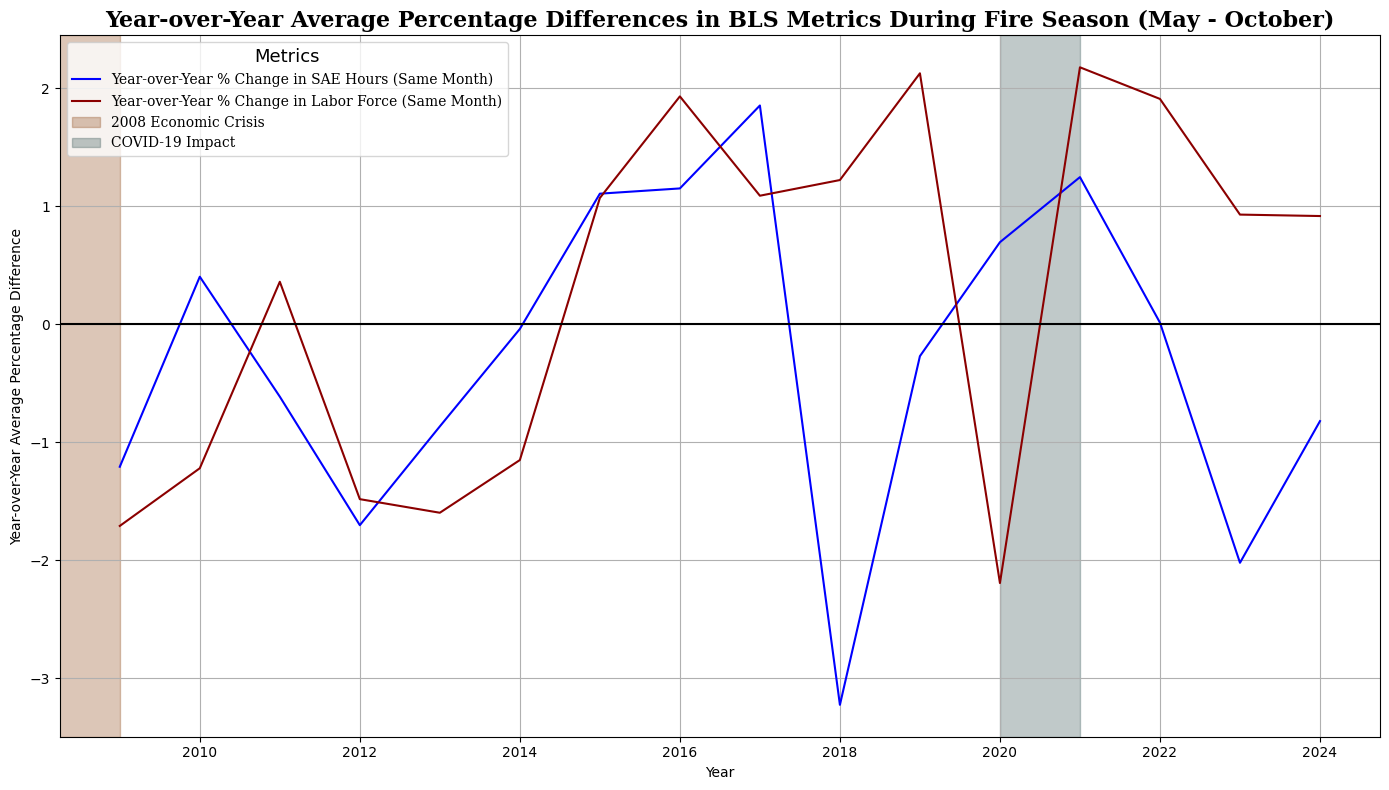

In [507]:
# Create a combined graph to show the average percentage differences for BLS datefields during fire season
plt.figure(figsize=(14, 8))

# Plot SAE Hours % Difference
plt.plot(fire_season_avg_df['year'], fire_season_avg_df['bls_pct_diff_sae_hrs'], label='Year-over-Year % Change in SAE Hours (Same Month)', color='blue')

# Plot Labor Force % Difference
plt.plot(fire_season_avg_df['year'], fire_season_avg_df['bls_pct_diff_laus_labor_force'], label='Year-over-Year % Change in Labor Force (Same Month)', color='darkred')

# Add a solid line at y=0 to indicate the zero mark
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

# Add shaded areas to highlight economic crises
plt.axvspan(2008, 2009, color='#8B4513', alpha=0.3, label='2008 Economic Crisis')
plt.axvspan(2020, 2021, color='#2F4F4F', alpha=0.3, label='COVID-19 Impact')

# Adding labels, title, legend, and grid
plt.xlabel('Year')
plt.ylabel('Year-over-Year Average Percentage Difference')
# plt.title('Year-over-Year Average Percentage Differences in BLS Metrics During Fire Season (May - October)')
plt.title(
    'Year-over-Year Average Percentage Differences in BLS Metrics During Fire Season (May - October)',
    fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'}
)
# plt.legend()
plt.legend(
    title='Metrics',
    title_fontsize=13,
    fontsize=11,
    fancybox=True,
    loc='upper left',
    prop={'family': 'serif'}
)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

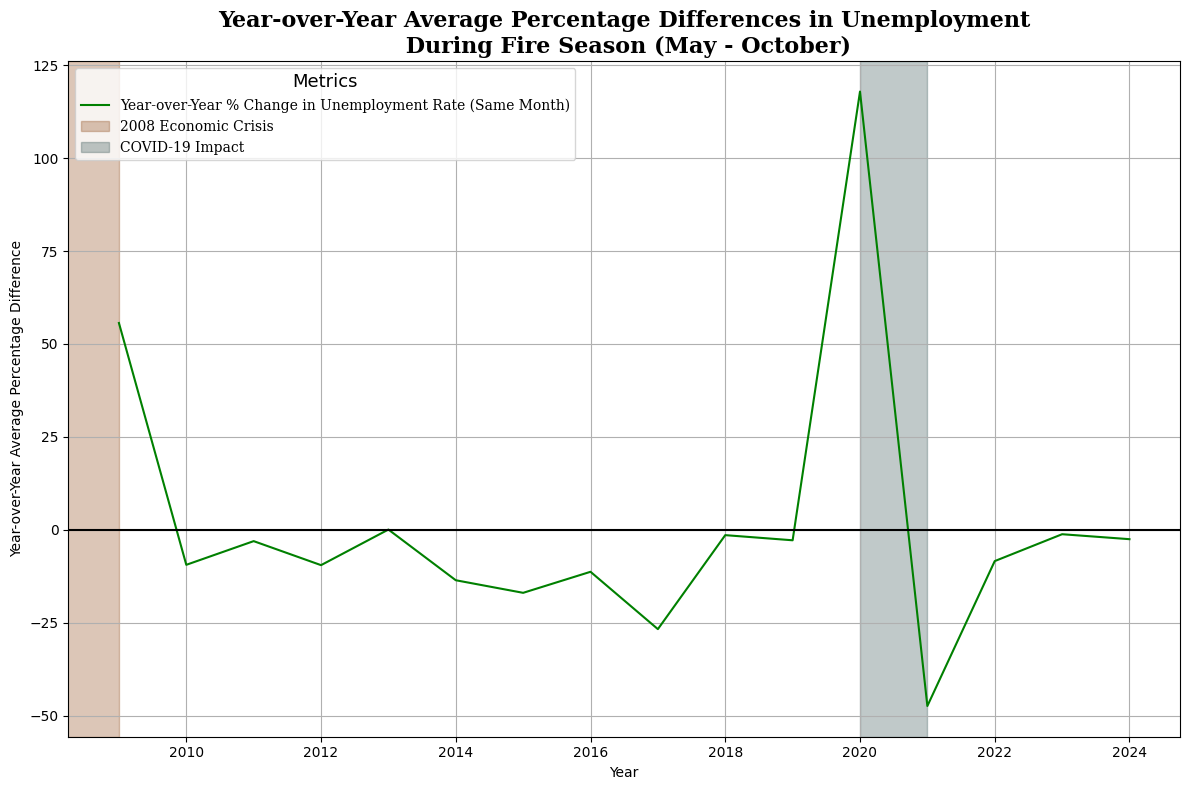

In [508]:
plt.figure(figsize=(12, 8))

# Plot Unemployment Rate % Difference
plt.plot(fire_season_avg_df['year'], fire_season_avg_df['bls_pct_diff_laus_unemployment_rate'], label='Year-over-Year % Change in Unemployment Rate (Same Month)', color='green')

# Add a solid line at y=0 to indicate the zero mark
plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)

# Add shaded areas to highlight economic crises
plt.axvspan(2008, 2009, color='#8B4513', alpha=0.3, label='2008 Economic Crisis')
plt.axvspan(2020, 2021, color='#2F4F4F', alpha=0.3, label='COVID-19 Impact')

# Adding labels, title, legend, and grid
plt.xlabel('Year')
plt.ylabel('Year-over-Year Average Percentage Difference')
plt.title(
    'Year-over-Year Average Percentage Differences in Unemployment\n During Fire Season (May - October)',
    fontdict={'family': 'serif', 'size': 16, 'weight': 'bold'}
)
plt.legend(
    title='Metrics',
    title_fontsize=13,
    fontsize=11,
    fancybox=True,
    loc='upper left',
    prop={'family': 'serif'}
)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## NOAA Data

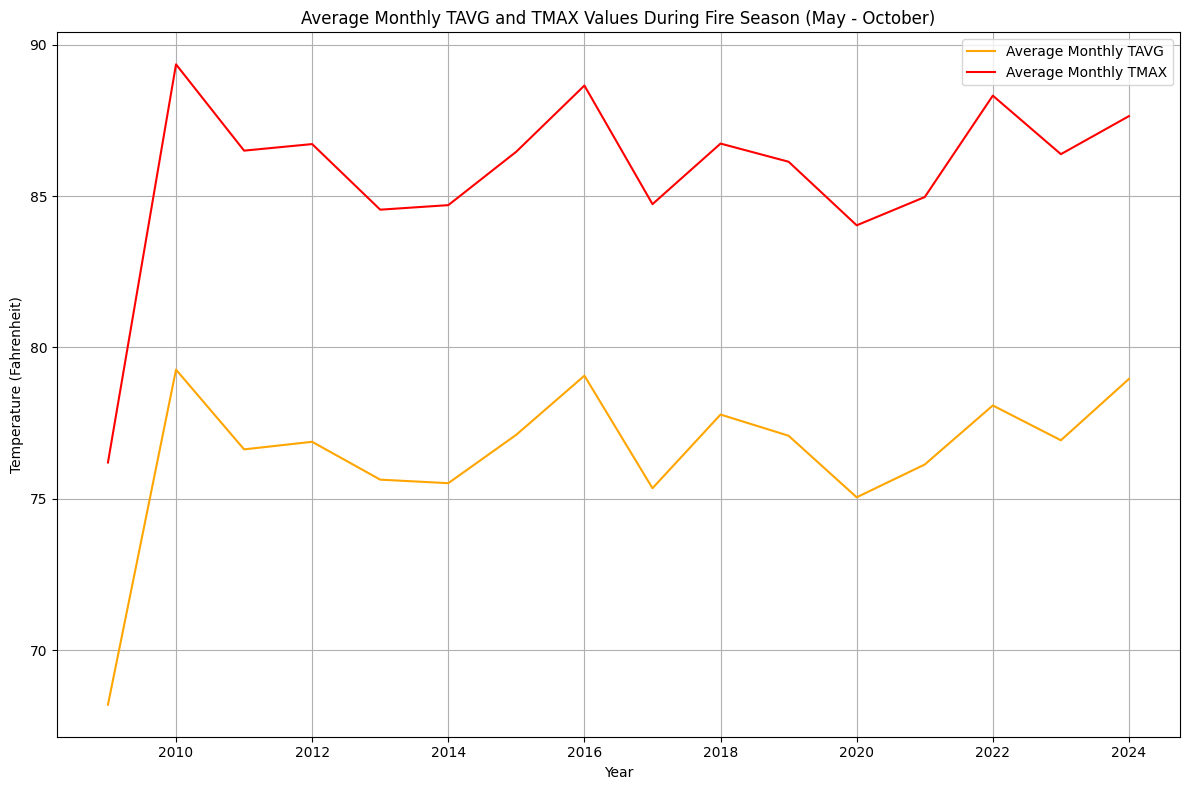

In [509]:
# %% [markdown]
# ## NOAA Data Graphs

# Calculate average values over the fire season for each year for NOAA columns
fire_season_avg_noaa_df = fire_season_df.groupby('year').agg({
    'noaa_tavg': 'mean',
    'noaa_tmax': 'mean',
    'noaa_prcp': 'mean'
}).reset_index()

# Create a combined graph to show the average temperature and precipitation values during the fire season
plt.figure(figsize=(12, 8))

# Plot Average Temperature
plt.plot(fire_season_avg_noaa_df['year'], fire_season_avg_noaa_df['noaa_tavg'], label='Average Monthly TAVG', color='orange')

# Plot Maximum Temperature
plt.plot(fire_season_avg_noaa_df['year'], fire_season_avg_noaa_df['noaa_tmax'], label='Average Monthly TMAX', color='red')


# Adding labels, title, legend, and grid
plt.xlabel('Year')
plt.ylabel('Temperature (Fahrenheit)')
plt.title('Average Monthly TAVG and TMAX Values During Fire Season (May - October)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


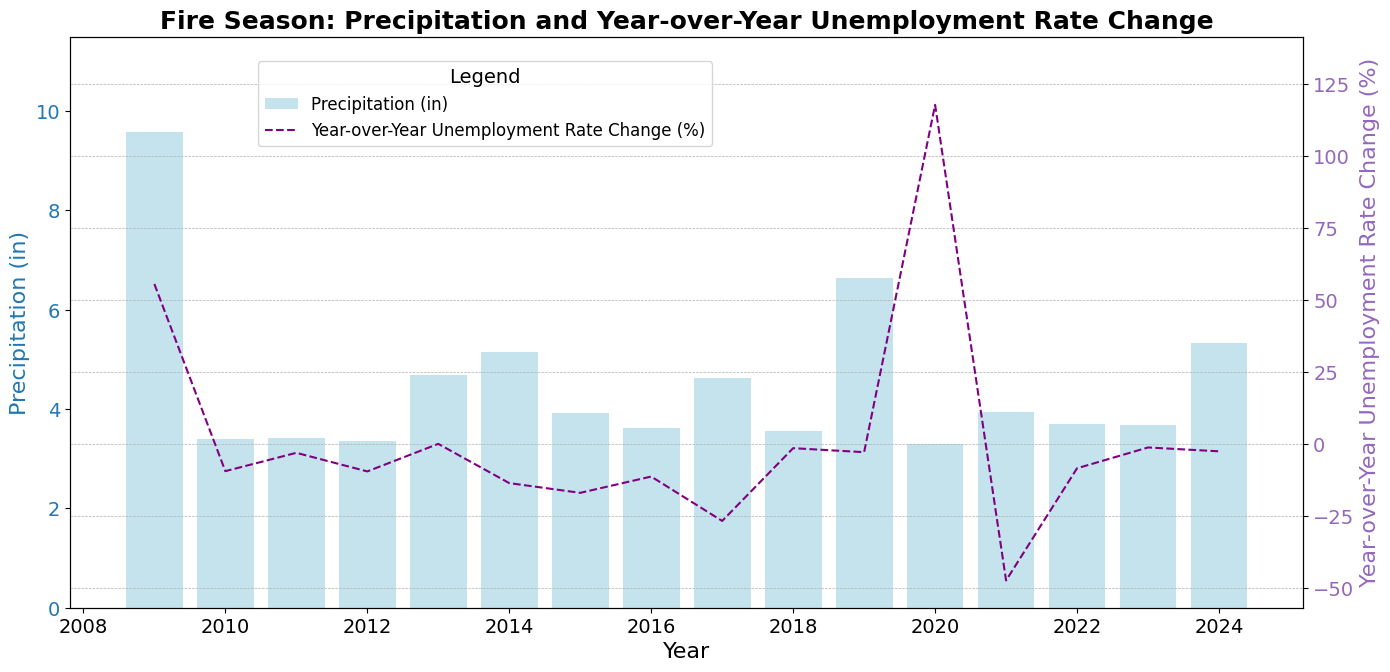

In [510]:
# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot precipitation as bars on the first y-axis
ax1.bar(
    fire_season_avg_noaa_df['year'], 
    fire_season_avg_noaa_df['noaa_prcp'], 
    label='Precipitation (in)', 
    color='lightblue', 
    alpha=0.7
)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Precipitation (in)', color='tab:blue', fontsize=16)
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

# Extend the y-axis for precipitation
ax1.set_ylim(0, fire_season_avg_noaa_df['noaa_prcp'].max() * 1.2)

# Add a second y-axis for year-over-year unemployment rate change
ax2 = ax1.twinx()

# Plot Year-over-Year Unemployment Rate % Change as a line on the second y-axis
ax2.plot(
    fire_season_avg_df['year'], 
    fire_season_avg_df['bls_pct_diff_laus_unemployment_rate'], 
    label='Year-over-Year Unemployment Rate Change (%)', 
    color='purple', 
    linestyle='--'
)

ax2.set_ylabel('Year-over-Year Unemployment Rate Change (%)', color='tab:purple', fontsize=16)
ax2.tick_params(axis='y', labelcolor='tab:purple', labelsize=14)

# Extend the y-axis for unemployment rate change
ax2.set_ylim(
    fire_season_avg_df['bls_pct_diff_laus_unemployment_rate'].min() * 1.2,
    fire_season_avg_df['bls_pct_diff_laus_unemployment_rate'].max() * 1.2
)

# Combine legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

fig.legend(
    handles1 + handles2, 
    labels1 + labels2, 
    loc='upper center',  # Place legend in the center
    bbox_to_anchor=(0.35, 0.78),  # Position legend beneath the title
    fontsize=12,
    title='Legend',
    title_fontsize=14,
    ncol=1  # Arrange legend items in two columns
)

# Add a title and grid
plt.title(
    'Fire Season: Precipitation and Year-over-Year Unemployment Rate Change',
    fontsize=18,
    weight='bold'
)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Adjust layout to ensure space for title and legend
plt.subplots_adjust(top=0.80)

# Show the plot
plt.show()
